In [1]:
#basics and plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
plt.style.use('ggplot')

# my functions!
from import_data import import_diabetes
from select_features import select_features
from error import RMSE
from test import test_model
from test import add_features
from plots import residual_plot, hists

# sklearn functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import KFold

In [2]:
# import data and select features
df = import_diabetes()

fdf = select_features(df)

In [3]:
# create X and y
full_y = (fdf['Diagnosed Diabetes Percentage']/100).values
full_X = fdf.drop(columns=['Diagnosed Diabetes Percentage'])



## train test split to create final test set for use in final model test
## (same code and random seed as eda notebook)
X, X_final_test, y, y_final_test = train_test_split(full_X, full_y, test_size = 0.2, random_state = 35)

In [4]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 6, random_state = 17, shuffle=True)

In [5]:
## recalculate top features for poisson regressor (same way as previous notebook)
model = PoissonRegressor(alpha=0)

features = []

scores = []
for _ in range(25):
    new_features, best_score = add_features(X,y,kf,model,initial_features=features)
    features = new_features
    scores.append(best_score)

In [6]:
# print out the feature names we're using in the final model
# these features
for i,feat in enumerate(full_X.columns[features[0:7]],1):
    print(f'{i}: {feat}')

1: Physical Inactivity Percentage
2: EP_UNEMP
3: Obesity Percentage
4: NHBA_PCT
5: in_south
6: NHIA_PCT
7: E_PCI


In [7]:
X = X.iloc[:,features[0:7]]
X_final_test = X_final_test.iloc[:,features[0:7]]

In [8]:
# Scale data for final model

scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)
X_test_scale = scaler.transform(X_final_test)

In [9]:
# fit final model
final = PoissonRegressor(alpha=0)
final.fit(X_scale,y)
yhat = final.predict(X_test_scale)

In [10]:
# Baseline for final model
m = np.mean(y)
yhat_mean = np.full(len(y_final_test),m)

In [11]:
# Comparison:
print(f'Baseline RMSE = {round(RMSE(yhat_mean,y_final_test),4)}')
print(f'Final model RMSE = {round(RMSE(yhat,y_final_test),4)}')

Baseline RMSE = 0.0175
Final model RMSE = 0.0106


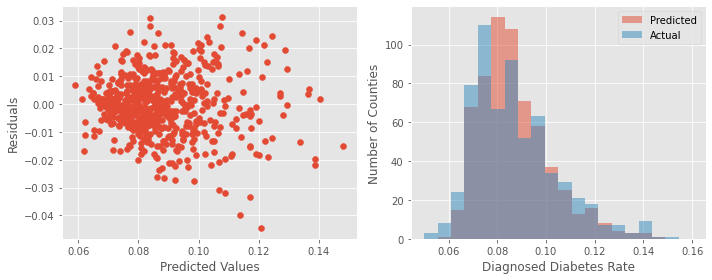

In [12]:
# Plot final residuals
fig,ax=plt.subplots(1,2,figsize=(10,4))
residual_plot(yhat,y_final_test,ax[0])
hists(yhat,y_final_test,ax[1])
fig.tight_layout()
fig.savefig('figs/final_residuals.png')

In [ ]:
## for fun, testing model using all data (no train test split)

In [13]:
# Scale data for model with all data
scaler = StandardScaler()
scaler.fit(full_X.iloc[:,features[0:7]])
X_scale = scaler.transform(full_X.iloc[:,features[0:7]])


In [14]:
# fit model with all data
final = PoissonRegressor(alpha=0)
final.fit(X_scale,full_y)
yhat = final.predict(X_scale)

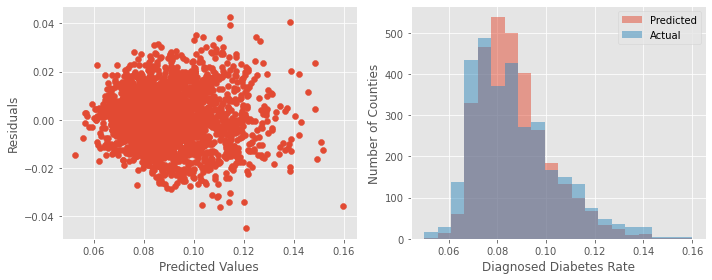

In [15]:
# plot model with all data
fig,ax=plt.subplots(1,2,figsize=(10,4))
residual_plot(yhat,full_y,ax[0])
hists(yhat,full_y,ax[1])
fig.tight_layout()